# 15. Prepoznavanje cifara

Baza se sastoji od 70000 slika cifara pisanih rukom. 

Podaci su razdvojeni na deo za obuku i deo za testiranje. 

Sve slike su predobrađene u smislu ujednačenja veličine slika i centriranja napisane cifre. 

Treba napraviti algoritam koji će na osnovu slike moći da prepozna koja cifra je napisana.

https://medium.com/machine-learning-algorithms-from-scratch/digit-recognition-from-0-9-using-deep-neural-network-from-scratch-8e6bcf1dbd3

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

from sklearn.model_selection import train_test_split, StratifiedKFold, LeaveOneOut
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

In [20]:
#podaci su vec uredjeni
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")


In [21]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
np.array(df.groupby("label").count().iloc[:,:1]).transpose()[0]

array([4132, 4684, 4177, 4351, 4072, 3795, 4137, 4401, 4063, 4188],
      dtype=int64)

<BarContainer object of 10 artists>

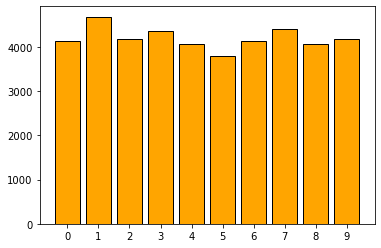

In [63]:
plt.xticks(range(10))
plt.bar(range(10), df.groupby("label").count().iloc[:,:1].transpose().iloc[0], color = "orange" , edgecolor = "black")

<Figure size 432x288 with 0 Axes>

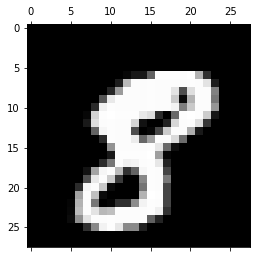

In [76]:
pl.gray()
pl.matshow(np.array(df.iloc[10])[1:].reshape(28,28))
pl.show()

<BarContainer object of 10 artists>

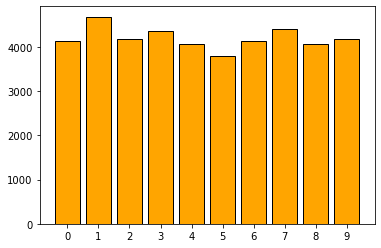

In [ ]:
plt.xticks(range(10))
plt.bar(range(10), df.groupby("label").count().iloc[:,:1].transpose().iloc[0], color = "orange" , edgecolor = "black")

<BarContainer object of 10 artists>

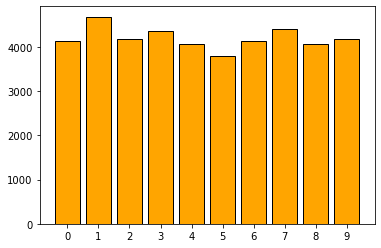

In [ ]:
plt.xticks(range(10))
plt.bar(range(10), df.groupby("label").count().iloc[:,:1].transpose().iloc[0], color = "orange" , edgecolor = "black")

In [ ]:
pl.gray()
pl.matshow(np.array(df_test.iloc[7]).reshape(28,28))
pl.show()

In [ ]:
test = np.array(df.iloc[9])[1:].reshape(28,28)
out = np.zeros(shape=(14,14))
for i in range(14):
    for j in range(14):
        out[i,j]= ((test[i*2,j*2] + test[i*2+1,j*2] + test[i*2,j*2+1] + test[i*2+1,j*2+1]))

pl.gray()
pl.matshow(out)
pl.show()

In [ ]:
out2 = np.zeros(shape=(7,7))
for i in range(7):
    for j in range(7):
        for x in range(4):
            for y in range(4):
                out2[i,j] += test[i * 4 + x, j * 4 + y]

pl.gray()
pl.matshow(out2)
pl.show()

In [ ]:
#moze i jednostavnije bez reshape
def reduce_img(img):
    

    test = np.array(img).reshape(28,28)
    out = np.zeros(shape=(14,14))
    for i in range(14):
        for j in range(14):
            out[i,j]= ((test[i*2,j*2] + test[i*2+1,j*2] + test[i*2,j*2+1] + test[i*2+1,j*2+1]))/1024
    

    return out.reshape(1, 196)

In [ ]:
non_reduced = df.iloc[:,1:].copy()
x_train_non_cut = np.zeros(shape=(non_reduced.shape[0],14*14))

non_reduced
for i in range(42000):
    x_train_non_cut[i] = reduce_img(non_reduced.iloc[i])


In [ ]:
pl.gray()
pl.matshow(x_train_non_cut[15].reshape(14,14))
pl.show()

In [ ]:
x_train = np.zeros(shape=(42000,10*10))
for i in range(42000):
    tmp = x_train_non_cut[i].reshape(14, 14)
    x_train[i] = tmp[2:12, 2:12].reshape(1,100)

In [ ]:
pl.gray()
pl.matshow(x_train[99].reshape(10,10))
pl.show()

In [ ]:
x_train
y_train = df.iloc[:,0].copy()
print(x_train.shape)
print(y_train.unique())
print(y_train)
x_train.shape

In [ ]:
def tacnost_po_klasi(mat_konf, klase):
    tacnost_i = []
    N = mat_konf.shape[0]
    for i in range(N):
        j = np.delete(np.array(range(N)),i) 
        TP = mat_konf[i,i]
        F = 0
        F = (sum(mat_konf[i,j]) + sum(mat_konf[j,i]))
        TN = sum(sum(mat_konf)) - F - TP
        tacnost_i.append((TP+TN)/sum(sum(mat_konf)))
        print('Za klasu ', klase[i], ' tacnost je: ', tacnost_i[i])
    tacnost_avg = np.mean(tacnost_i)
    return tacnost_avg

def osetljivost_po_klasi(mat_konf, klase):
    osetljivost_i = []
    N = mat_konf.shape[0]
    for i in range(N):
        j = np.delete(np.array(range(N)),i) 
        TP = mat_konf[i,i]
        FN = sum(mat_konf[i,j])
        osetljivost_i.append(TP/(TP+FN))
        print('Za klasu ', klase[i], ' osetljivost je: ', osetljivost_i[i])
    osetljivost_avg = np.mean(osetljivost_i)
    return osetljivost_avg

def specificnost_po_klasi(mat_konf, klase):
  specificnost_i = []
  N = mat_konf.shape[0]
  for i in range(N):
    j = np.delete(np.array(range(N)),i) 
    TP = mat_konf[i,i]
    FN = sum(mat_konf[i,j])
    F = (sum(mat_konf[i,j]) + sum(mat_konf[j,i]))
    TN = sum(sum(mat_konf)) - F - TP
    FP = F - FN
    specificnost_i.append(TN/(TN+FP))
    print('Za klasu ', klase[i], ' specificnost je: ', specificnost_i[i])
  return np.mean(specificnost_i)


def preciznost_po_klasi(mat_konf, klase):
  preciznost_i = []
  N = mat_konf.shape[0]
  for i in range(N):
    j = np.delete(np.array(range(N)),i) 
    TP = mat_konf[i,i]
    FN = sum(mat_konf[i,j])
    F = (sum(mat_konf[i,j]) + sum(mat_konf[j,i]))
    TN = sum(sum(mat_konf)) - F - TP
    FP = F - FN
    preciznost_i.append(TP/(TP+FP))
    print('Za klasu ', klase[i], ' preciznost je: ', preciznost_i[i])
  return np.mean(preciznost_i)


In [ ]:
hidden_layer_sizes_bunch = [(64, 64), (64, 32)]
activation_bunch = ["relu"]
solver_bunch = ["adam"]

i = 0
for solver_fun in solver_bunch:
  print("$$$$$$$$$$$\nSOLVER fun")
  print(f"solver_fun  {solver_fun}")
  for activation_fun in activation_bunch:
    print("############")
    print(f"activation_fun  {activation_fun}")
    for layer in hidden_layer_sizes_bunch:
      print(f"layer  {layer}")

      kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
      indexes = kf.split(x_train, y_train)
      fin_conf_mat = np. zeros((len(np.unique(y_train)),len(np.unique(y_train))))
      for train_index, test_index in indexes:
          print(i)
          i+=1
          classifier = MLPClassifier(hidden_layer_sizes= layer, activation=activation_fun,
                                    solver=solver_fun, batch_size=50, learning_rate='adaptive', 
                                    learning_rate_init=0.001, max_iter=100, shuffle=True,
                                    random_state=42, early_stopping=True, n_iter_no_change=10,
                                    validation_fraction=0.1, verbose=False)
          classifier.fit(x_train[train_index], y_train[train_index])
          y_pred = classifier.predict(x_train[test_index])
          fin_conf_mat += confusion_matrix(y_train[test_index], y_pred)
      print('konacna matrica konfuzije: \n')
      disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_)
      cm = confusion_matrix(np.arange(25), np.arange(25))
      fig, ax = plt.subplots(figsize=(10,10))
      disp.plot(ax=ax, cmap="Blues", values_format='')
      plt.show()

      print('procenat tacno predvidjenih: ', sum(np.diag(fin_conf_mat))/sum(sum(fin_conf_mat)))
      print('prosecna osetljivost je: ', osetljivost_po_klasi(fin_conf_mat, range(10)))

In [ ]:
metric_banch = ["dice"]
for n in range(10):
  print("######")
  print(f"komsije {n+1}")
  for metric_fun in metric_banch:
    print("##########")
    print(f"metric_fun {metric_fun}")
    kf = StratifiedKFold(n_splits= 5, shuffle=True, random_state=42)
    indexes = kf.split(x_train, y_train)
    fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))
    for train_index, test_index in indexes:
        
        classifier = KNeighborsClassifier(n_neighbors= n+1, metric=metric_fun)
        classifier.fit(x_train[train_index], y_train[train_index])
        
        y_pred = classifier.predict(x_train[test_index])
        

        fin_conf_mat += confusion_matrix(y_train[test_index], y_pred)

        plt.show()

        print(accuracy_score(y_train[test_index], y_pred))

    print('procenat tacno predvidjenih: ', sum(np.diag(fin_conf_mat))/sum(sum(fin_conf_mat)))    
    print('finalna matrica je: ')
    disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_)

    cm = confusion_matrix(np.arange(25), np.arange(25))
    fig, ax = plt.subplots(figsize=(10,10))
    disp.plot(ax=ax, cmap="Blues", values_format='')

    plt.show()

#############
c 1
F linear
procenat tacno predvidjenih:  0.9366428571428571
finalna matrica je: 


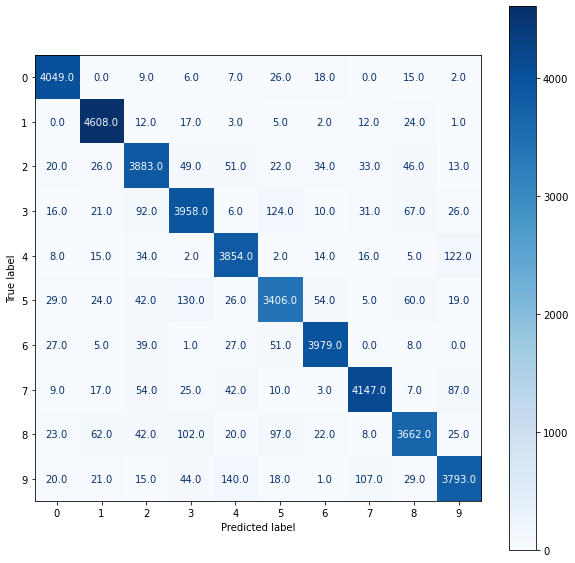

#############
c 1
F rbf
procenat tacno predvidjenih:  0.9771666666666666
finalna matrica je: 


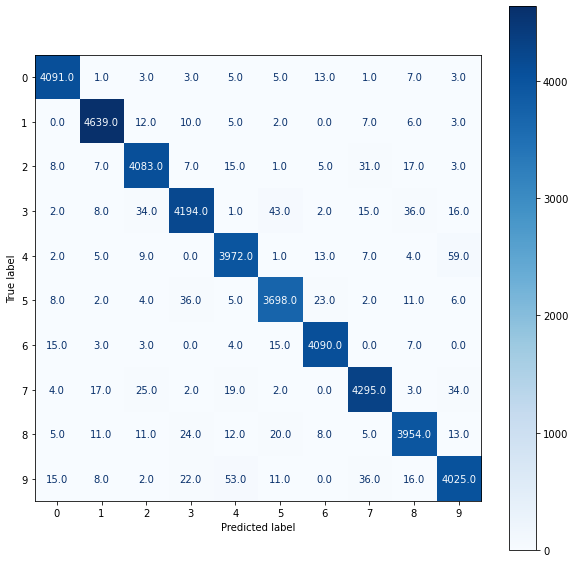

#############
c 10
F linear
procenat tacno predvidjenih:  0.9341904761904762
finalna matrica je: 


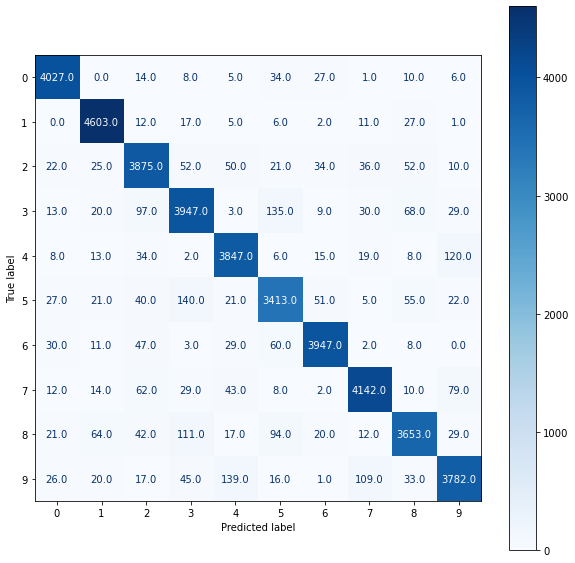

#############
c 10
F rbf
procenat tacno predvidjenih:  0.9816904761904762
finalna matrica je: 


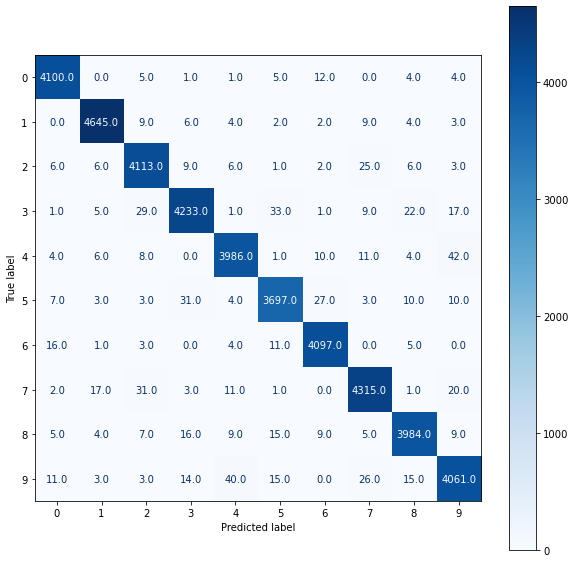

#############
c 100
F linear
procenat tacno predvidjenih:  0.9325952380952381
finalna matrica je: 


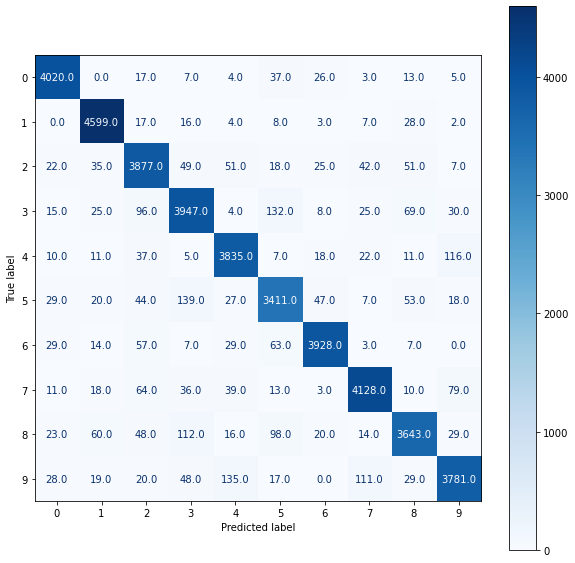

#############
c 100
F rbf
procenat tacno predvidjenih:  0.9811190476190477
finalna matrica je: 


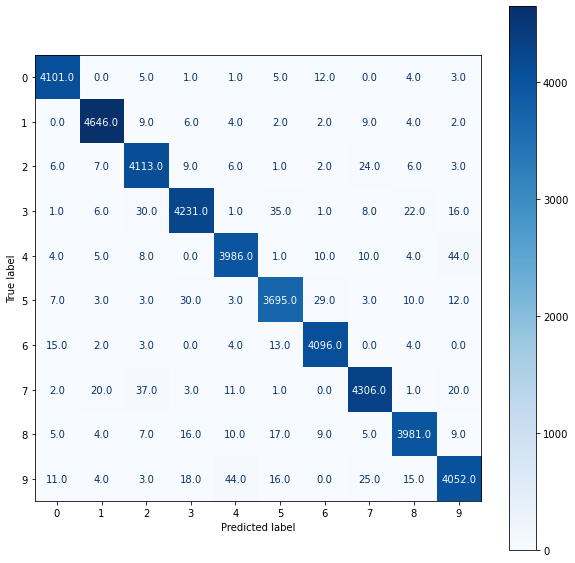

In [18]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for c in [1, 10, 100]:
    for F in ['linear', 'rbf']:
        print("#############")
        print(f"c {c}")
        print(f"F {F}")
        indexes = kf.split(x_train, y_train)
        fin_conf_mat = np.zeros((len(np.unique(y_train)),len(np.unique(y_train))))
        for train_index, test_index in indexes:
            classifier = SVC(C=c, kernel=F)
            classifier.fit(x_train[train_index], y_train[train_index])
            y_pred = classifier.predict(x_train[test_index])
            fin_conf_mat += confusion_matrix(y_train[test_index], y_pred)
        print('procenat tacno predvidjenih: ', sum(np.diag(fin_conf_mat))/sum(sum(fin_conf_mat)))
        print('finalna matrica je: ')
        disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_)
        cm = confusion_matrix(np.arange(25), np.arange(25))
        fig, ax = plt.subplots(figsize=(10,10))
        disp.plot(ax=ax, cmap="Blues", values_format='')
        plt.show()